In [1]:
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.io import fits
import bz2
from astroquery.gemini import Observations
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, FuncFormatter
import wget
import json
import plotly.graph_objects as go

In [3]:
import sys

sys.executable

'/net/ASTRO/brunoritter/miniconda3/envs/qperedux/bin/python'

In [2]:
#path = "/gmos/gs-2022b-q-202/"
path = ""

#### Define util functions

In [160]:
def download_files(filenames):
    for file in filenames:
        Observations.get_file(filename=file, download_dir=f"{path}raw/")

        decompressed_filename = file.replace(".bz2", "")
        with bz2.open(f"{path}raw/{file}", "rb") as compressed_file, open(
            f"{path}raw/{decompressed_filename}", "wb"
        ) as decompressed_file:
            decompressed_file.write(compressed_file.read())
        print(f"{file} decompressed to {decompressed_filename}")

In [ ]:
def query_metadata(filename):
    metadata = Observations.query_criteria(filename=filename).to_pandas()
    # metadata = metadata.loc[:,['name', 'exposure_time', 'ut_datetime', 'observation_id', 'data_label', 'object', 'observation_class', 'observation_type', 'central_wavelength']]
    metadata = metadata.to_dict(orient="records")
    return metadata[0]

#### Make data catalogs

In [77]:
with open(f"{path}files.txt", "r") as f:
    files = f.readlines()

files = [filename.strip() for filename in files]
downloaded_catalog = pd.DataFrame([query_metadata(file) for file in files])
downloaded_catalog.to_csv(f"{path}data_catalog.csv", index=False)

In [34]:
program_catalog = Observations.query_criteria(program_id="GS-2022B-Q-202").to_pandas()
program_catalog["ut_datetime"] = pd.to_datetime(program_catalog["ut_datetime"])
program_catalog['exposure_time'] = program_catalog['exposure_time'].astype(float)

#### Explore science data

In [3]:
downloaded_catalog = pd.read_csv(f"{path}data_catalog.csv")
downloaded_catalog["ut_datetime"] = pd.to_datetime(downloaded_catalog["ut_datetime"])

In [35]:
science = program_catalog.loc[
    (
        (program_catalog["observation_class"] == "science")
        | (program_catalog["observation_class"] == "partnerCal")
    )
].reset_index()

In [64]:
science.loc[
    :,
    [
        "filename",
        "data_label",
        "object",
        "observation_type",
        "observation_class",
        "ut_datetime",
        "central_wavelength",
        "exposure_time",
    ],
].sort_values("object")

filename             data_label     object   
0   S20220918S0057.fits.bz2   GS-2022B-Q-202-7-001  CD-34 241  \
2   S20220918S0059.fits.bz2   GS-2022B-Q-202-7-003  CD-34 241   
3   S20220918S0060.fits.bz2   GS-2022B-Q-202-7-005  CD-34 241   
22  S20220929S0064.fits.bz2  GS-2022B-Q-202-21-008   GCALflat   
21  S20220929S0063.fits.bz2  GS-2022B-Q-202-21-007   GCALflat   
18  S20220929S0060.fits.bz2  GS-2022B-Q-202-21-004   GCALflat   
17  S20220929S0059.fits.bz2  GS-2022B-Q-202-21-003   GCALflat   
11  S20220929S0050.fits.bz2  GS-2022B-Q-202-28-007   GCALflat   
12  S20220929S0051.fits.bz2  GS-2022B-Q-202-28-008   GCALflat   
7   S20220929S0046.fits.bz2  GS-2022B-Q-202-28-003   GCALflat   
4   S20220918S0061.fits.bz2   GS-2022B-Q-202-7-006   GCALflat   
1   S20220918S0058.fits.bz2   GS-2022B-Q-202-7-002   GCALflat   
8   S20220929S0047.fits.bz2  GS-2022B-Q-202-28-004   GCALflat   
9   S20220929S0048.fits.bz2  GS-2022B-Q-202-28-005    GSN 069   
10  S20220929S0049.fits.bz2  GS-2022B-Q-202-28-006    GSN 069   
13  S20220929S0052.fits.bz2  GS-2022B-Q-202-28-009    GSN 069   
14  S20220929S0053.fits.bz2  GS-2022B-Q-202-28-010    GSN 069   
6   S20220929S0045.fits.bz2  GS-2022B-Q-202-28-002    GSN 069   
5   S20220929S0044.fits.bz2  GS-2022B-Q-202-28-001    GSN 069   
23  S20220929S0065.fits.bz2  GS-2022B-Q-202-21-009   eRO-QPE2   
15  S20220929S0057.fits.bz2  GS-2022B-Q-202-21-001   eRO-QPE2   
16  S20220929S0058.fits.bz2  GS-2022B-Q-202-21-002   eRO-QPE2   
19  S20220929S0061.fits.bz2  GS-2022B-Q-202-21-005   eRO-QPE2   
20  S20220929S0062.fits.bz2  GS-2022B-Q-202-21-006   eRO-QPE2   
24  S20220929S0066.fits.bz2  GS-2022B-Q-202-21-010   eRO-QPE2   

   observation_type observation_class             ut_datetime   
0            OBJECT        partnerCal 2022-09-18 02:44:13.200  \
2            OBJECT        partnerCal 2022-09-18 02:53:37.200   
3            OBJECT        partnerCal 2022-09-18 03:05:47.200   
22             FLAT        partnerCal 2022-09-29 06:33:15.200   
21             FLAT        partnerCal 2022-09-29 06:30:37.200   
18             FLAT        partnerCal 2022-09-29 05:55:48.200   
17             FLAT        partnerCal 2022-09-29 05:53:10.200   
11             FLAT        partnerCal 2022-09-29 04:19:31.200   
12             FLAT        partnerCal 2022-09-29 04:22:09.200   
7              FLAT        partnerCal 2022-09-29 03:44:44.200   
4              FLAT        partnerCal 2022-09-18 03:16:52.200   
1              FLAT        partnerCal 2022-09-18 02:50:18.200   
8              FLAT        partnerCal 2022-09-29 03:47:22.200   
9            OBJECT           science 2022-09-29 03:49:57.200   
10           OBJECT           science 2022-09-29 04:04:46.200   
13           OBJECT           science 2022-09-29 04:24:45.200   
14           OBJECT           science 2022-09-29 04:39:15.700   
6            OBJECT           science 2022-09-29 03:29:58.700   
5            OBJECT           science 2022-09-29 03:15:28.700   
23           OBJECT           science 2022-09-29 06:35:50.200   
15           OBJECT           science 2022-09-29 05:21:14.200   
16           OBJECT           science 2022-09-29 05:37:04.700   
19           OBJECT           science 2022-09-29 05:58:23.200   
20           OBJECT           science 2022-09-29 06:14:31.700   
24           OBJECT           science 2022-09-29 06:51:39.700   

   central_wavelength  exposure_time  
0               0.575          300.0  
2               0.575          600.0  
3               0.605          600.0  
22              0.605           90.0  
21              0.575           90.0  
18              0.605           90.0  
17              0.575           90.0  
11              0.575           90.0  
12              0.605           90.0  
7               0.575           90.0  
4               0.605           90.0  
1               0.575           90.0  
8               0.605           90.0  
9               0.605          820.0  
10              0.575          820.0  
13           

#### Prepare star files

In [112]:
(
    program_catalog.loc[
        (program_catalog["observation_class"] == "partnerCal")
        & (program_catalog["ut_datetime"] < "2022-09-29"),
        [
            "filename",
            "data_label",
            "object",
            "observation_type",
            "ut_datetime",
            "central_wavelength",
            "exposure_time",
        ],
    ]
)

filename            data_label     object observation_type   
5  S20220918S0057.fits.bz2  GS-2022B-Q-202-7-001  CD-34 241           OBJECT  \
6  S20220918S0058.fits.bz2  GS-2022B-Q-202-7-002   GCALflat             FLAT   
7  S20220918S0059.fits.bz2  GS-2022B-Q-202-7-003  CD-34 241           OBJECT   
8  S20220918S0060.fits.bz2  GS-2022B-Q-202-7-005  CD-34 241           OBJECT   
9  S20220918S0061.fits.bz2  GS-2022B-Q-202-7-006   GCALflat             FLAT   

                  ut_datetime central_wavelength exposure_time  
5  2022-09-18 02:44:13.200000              0.575         300.0  
6  2022-09-18 02:50:18.200000              0.575          90.0  
7  2022-09-18 02:53:37.200000              0.575         600.0  
8  2022-09-18 03:05:47.200000              0.605         600.0  
9  2022-09-18 03:16:52.200000              0.605          90.0

In [148]:
# Get filenames from catalog
star_filenames = (
    (
        program_catalog.loc[
            (program_catalog["observation_class"] == "partnerCal")
            & (program_catalog["ut_datetime"] < "2022-09-29"),
            ["filename"],
        ]
    )
    .reset_index()
    .iloc[1:, 1]
    .tolist()
)

# Download and decompress files
download_files(star_filenames)

S20220918S0058.fits.bz2 decompressed to S20220918S0058.fits
S20220918S0059.fits.bz2 decompressed to S20220918S0059.fits
S20220918S0060.fits.bz2 decompressed to S20220918S0060.fits
S20220918S0061.fits.bz2 decompressed to S20220918S0061.fits


In [122]:
# Select star bias files and make a list
star_biases = downloaded_catalog.loc[
    (downloaded_catalog["observation_type"] == "BIAS")
    & (downloaded_catalog["ut_datetime"] > "2022-09-12")
    & (downloaded_catalog["ut_datetime"] < "2022-09-24")
    & (downloaded_catalog["detector_binning"] == "2x1")
]
print(f"Files selected: {star_biases.shape[0]}")

biasfiles = star_biases.loc[:, "name"].str.replace(".fits", "").tolist()
with open(f"{path}redux/starbias.lis", "w") as f:
    for bias in biasfiles:
        f.write(f"{bias}\n")

Files selected: 30


#### Verify MDF

##### Interactive adjustments

In [97]:
fname = f"{path}/redux/rgS20220918S0058.fits"

dat = Table.read(fname, format="fits")
mdf = dat.to_pandas()
mdf.loc[mdf["BEAM"] == -1]

NO      XINST  YINST     BLOCK  BEAM  XLDIS  YLDIS
137  138   0.866013    2.5   b'H_38'    -1     26     24
204  205  58.268002    4.0   b'20_5'    -1     41     19
449  450  58.787609    4.9  b'19_50'    -1     50     16
689  690  61.558849    2.9  b'11_40'    -1     30      0
691  692  61.558849    3.3  b'11_42'    -1     34      0
744  745   0.173203    3.9   b'J_45'    -1     40     28
745  746   0.173203    4.1   b'J_46'    -1     42     28
746  747   0.173203    4.3   b'J_47'    -1     44     28
747  748   0.173203    4.5   b'J_48'    -1     46     28
748  749   0.173203    4.7   b'J_49'    -1     48     28
749  750   0.173203    4.9   b'J_50'    -1     50     28

In [112]:
# 743 = 1
# 744 = 1
# 745 = 1
# 746 = 1
# 747 = 1

with fits.open(fname) as file:
    file["MDF"].data[746][4] = 1
    file.writeto(fname, overwrite=True)

In [111]:
teste = fits.open(fname, format="fits")
print(teste["MDF"].data[745])
teste.close()

(746, 0.17320251, 4.1, 'J_46', 1, 42, 28)


##### Make master MDF - Works for both star and science

In [141]:
fibers_to_activate = [743, 744, 745, 746, 747]
mdf_filename = "gsifu_slitr_mdf_HAM.fits"

mdf = Table.read(f"{path}redux/{mdf_filename}")

for fiber in fibers_to_activate:
    mdf["BEAM"][fiber - 1] = 1

mdf.write(f"{path}redux/reviewed_{mdf_filename}", overwrite=True)

#### Prepare lamp files

In [157]:
(
    program_catalog.loc[
        (program_catalog["observation_type"] == "ARC"),  # &
        # (program_catalog['ut_datetime']<'2022-09-29'),
        [
            "filename",
            "data_label",
            "object",
            "observation_type",
            "ut_datetime",
            "central_wavelength",
            "exposure_time",
        ],
    ]
)

filename             data_label object observation_type   
10  S20220918S0170.fits.bz2   GS-2022B-Q-202-5-001   CuAr              ARC  \
11  S20220918S0389.fits.bz2   GS-2022B-Q-202-5-002   CuAr              ARC   
12  S20220918S0390.fits.bz2   GS-2022B-Q-202-5-003   CuAr              ARC   
41  S20220929S0097.fits.bz2  GS-2022B-Q-202-29-001   CuAr              ARC   
42  S20220929S0098.fits.bz2  GS-2022B-Q-202-29-002   CuAr              ARC   
43  S20220929S0099.fits.bz2  GS-2022B-Q-202-22-001   CuAr              ARC   
44  S20220929S0100.fits.bz2  GS-2022B-Q-202-22-002   CuAr              ARC   

                   ut_datetime central_wavelength exposure_time  
10  2022-09-18 09:30:35.700000               0.58          45.0  
11  2022-09-18 16:12:58.200000              0.575          45.0  
12  2022-09-18 16:14:31.700000              0.605          45.0  
41  2022-09-29 09:59:15.700000              0.575          45.0  
42  2022-09-29 10:00:49.700000              0.605          45.0  
43  2022-09-29 10:02:23.700000              0.575          45.0  
44  2022-09-29 10:03:56.700000              0.605          45.0

In [173]:
lamp_filenames = program_catalog.loc[(program_catalog["observation_type"] == "ARC")][
    "filename"
].to_list()

download_files(lamp_filenames)

S20220918S0170.fits.bz2 decompressed to S20220918S0170.fits
S20220918S0389.fits.bz2 decompressed to S20220918S0389.fits
S20220918S0390.fits.bz2 decompressed to S20220918S0390.fits
S20220929S0097.fits.bz2 decompressed to S20220929S0097.fits
S20220929S0098.fits.bz2 decompressed to S20220929S0098.fits
S20220929S0099.fits.bz2 decompressed to S20220929S0099.fits
S20220929S0100.fits.bz2 decompressed to S20220929S0100.fits


#### Check scattered light in stars

In [43]:
def format_ticks(value, pos):
    num_decimal_places = 2  # Adjust the number of decimal places as desired
    return f"{value:.{num_decimal_places}f}"

import numpy as np

def replace_outliers_2d(data_2d, factor=1.5):
    """
    Substitui os outliers de um array bidimensional numpy usando o método do Intervalo Interquartil (IQR)
    com o valor mínimo do array.

    Parâmetros:
    - data_2d: array bidimensional numpy contendo os dados
    - factor: fator multiplicativo para o IQR. Valor padrão é 1.5.

    Retorna:
    - Array bidimensional numpy com outliers substituídos pelo valor mínimo.
    """
    
    # Flatten o array
    flattened_data = data_2d.flatten()
    
    # Calcula o valor mínimo
    min_value = np.min(flattened_data)
    
    # Identificar os outliers
    Q1 = np.percentile(flattened_data, 25)
    Q3 = np.percentile(flattened_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers_mask = (flattened_data < lower_bound) | (flattened_data > upper_bound)
    
    # Substituir outliers pelo valor mínimo
    flattened_data[outliers_mask] = min_value
    
    # Remodelar para a forma original
    reshaped_data = flattened_data.reshape(data_2d.shape)
    
    return reshaped_data

def plot_scattered_light(amp, original, corrected, mode):
    fig = plt.figure(figsize=(30, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.05])

    original_data = replace_outliers_2d(original[amp].data, 1.7)
    corrected_data = replace_outliers_2d(corrected[amp].data, 1.7)
    #original_data = original[amp].data
    diff = original[amp].data - corrected[amp].data

    ax = fig.add_subplot(gs[0, 0])

    if mode == "relative":
        relative_diff = diff / original_data
        im = ax.imshow(relative_diff.T, cmap="rainbow")
    elif mode == "absolute":
        im = ax.imshow(diff.T, cmap="rainbow")
    elif mode == "corrected":
        im = ax.imshow(corrected_data.T, cmap="rainbow")
    elif mode == "original":
        im = ax.imshow(original_data.T, cmap="rainbow")
        print(f"Média: {np.mean(original_data)}")
        print(f"Mediana: {np.median(original_data)}")
        print(f"Desvio padrão: {np.std(original_data)}")
        print(f"Variância: {np.var(original_data)}")
        print(f"Mínimo: {np.min(original_data)}")
        print(f"Máximo: {np.max(original_data)}")
    else:
        raise (ValueError("'mode' needs to be 'absolute', 'relative', or 'original"))

    ax.set_title(f"Amp {amp} - {mode}")
    # Create the colorbar
    cax = fig.add_subplot(gs[1, 0])
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    cbar.ax.xaxis.set_major_locator(MaxNLocator(nbins=30))

    # Customize the tick labels on the colorbar
    formatter = FuncFormatter(format_ticks)
    cbar.ax.xaxis.set_major_formatter(formatter)

    plt.tight_layout()
    plt.show()

Média: 5.281674385070801
Mediana: 7.861611366271973
Desvio padrão: 15.740633964538574
Variância: 247.76754760742188
Mínimo: -50.93113708496094
Máximo: 30.47605323791504


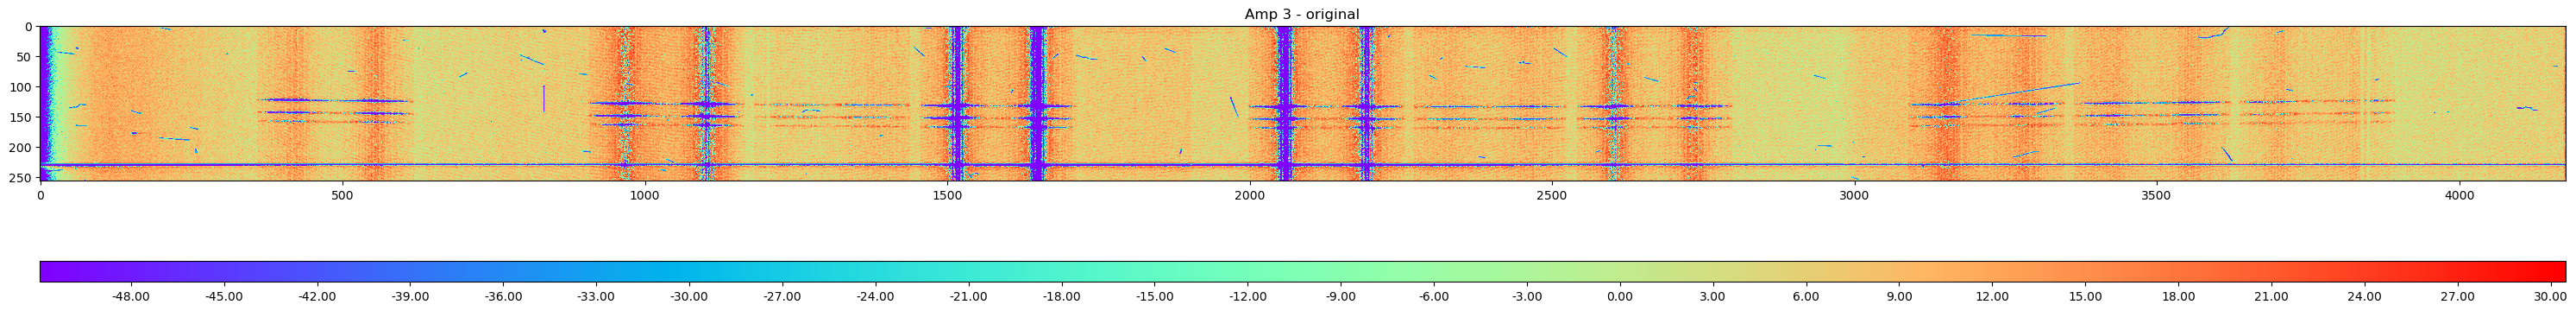

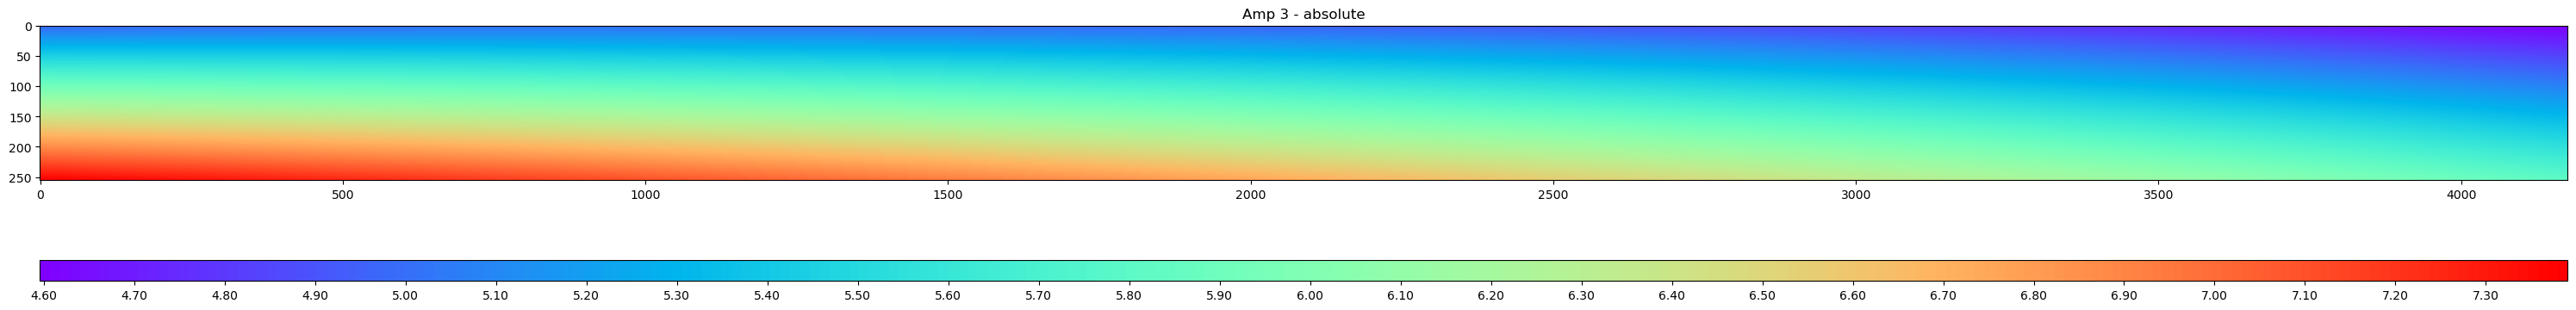

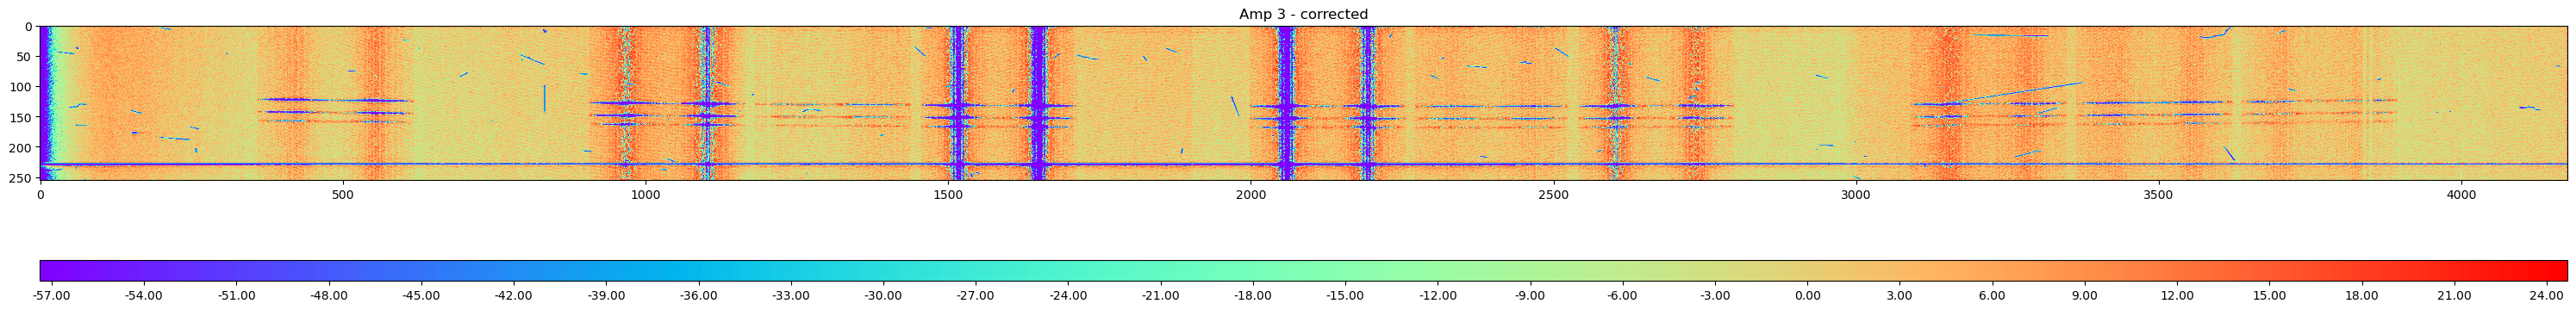

In [58]:
file = "S20220929S0045.fits"

original = fits.open(f"{path}redux/rg{file}")
corrected = fits.open(f"{path}redux/brg{file}")
amp = 3

plot_scattered_light(amp=amp, original=original, corrected=corrected, mode="original")
plot_scattered_light(amp=amp, original=original, corrected=corrected, mode="absolute")
plot_scattered_light(amp=amp, original=original, corrected=corrected, mode="corrected")

##### Download star standard

In [55]:
ftp_path = "ftp://ftp.eso.org/pub/users/stecf/standards/ctiostan/fcd_34d241.dat"
local_path = "/net/ASTRO/brunoritter/miniconda3/envs/geminiconda/iraf/noao/lib/onedstds/ctiostan/fcd_34d241.dat"

wget.download(ftp_path, local_path)

100% [................................................................................] 9024 / 9024

'/net/ASTRO/brunoritter/miniconda3/envs/geminiconda/iraf/noao/lib/onedstds/ctiostan/fcd_34d241.dat'

#### Make science bias list

In [81]:
biases = downloaded_catalog.loc[
    (downloaded_catalog["observation_type"] == "BIAS")
    & (downloaded_catalog["ut_datetime"] > "2022-09-24")
    & (downloaded_catalog["detector_binning"] == "2x1")
]
print(f"Files selected: {biases.shape[0]}")
biasfiles = biases.loc[:, "name"].str.replace(".fits", "").tolist()
with open(f"{path}redux/bias.lis", "w") as f:
    for bias in biasfiles:
        f.write(f"{bias}\n")

Files selected: 30


#### Map science files

In [20]:
# Prepare science flat list
[
    file.replace(".bz2", "")
    for file in science.loc[
        (science["ut_datetime"] > "2022-09-29") & (science["object"] == "GCALflat"),
        "filename",
    ].tolist()
]

['S20220929S0046.fits',
 'S20220929S0047.fits',
 'S20220929S0050.fits',
 'S20220929S0051.fits',
 'S20220929S0059.fits',
 'S20220929S0060.fits',
 'S20220929S0063.fits',
 'S20220929S0064.fits']

In [79]:
def find_closest_flat(row):
    time_differences = abs(flats["ut_datetime"] - row["ut_datetime"])
    closest_index = time_differences.idxmin()
    return flats.loc[closest_index, "filename"]


def find_arc_file(cw):
    arc_index = (
        program_catalog.loc[
            (program_catalog["observation_type"] == "ARC")
            & (program_catalog["central_wavelength"] == cw)
            & (program_catalog["ut_datetime"] > "2022-09-20"),
            "ut_datetime",
        ]
    ).idxmax()

    return program_catalog.loc[arc_index, "filename"]

def find_parter_star(cw):
    star_index = (
        program_catalog.loc[
            (program_catalog["observation_class"] == "partnerCal")
            & (program_catalog["central_wavelength"] == cw)
            & (program_catalog["ut_datetime"] < "2022-09-29"),
            "exposure_time"
        ]
    ).idxmax()

    return program_catalog.loc[star_index, "filename"]

# mapping structure:
# |-- central wavelength
# |----sci
# |------ flat
# |------ arc

sci_files_mapping = {}
sci_objects = science[science['observation_class']=='OBJECT']['object'].unique()
#for cw in science["central_wavelength"].unique():
for cw in science["central_wavelength"].unique():
    sci_data = science.loc[
        (science["central_wavelength"] == cw)
        & (science["observation_class"] == "science")
        & (science["ut_datetime"] > "2022-09-28"),
        ["object", "filename", "ut_datetime"],
    ]
    flats = science.loc[
        (science["central_wavelength"] == cw)
        & (science["observation_type"] == "FLAT")
        & (science["ut_datetime"] > "2022-09-28"),
        ["filename", "ut_datetime"],
    ]
    sci_data["flat"] = sci_data.apply(find_closest_flat, axis=1)
    arc_file = find_arc_file(cw=cw)
    star_file = find_parter_star(cw=cw)
    sci_files_mapping[cw] = {}
    for row in sci_data.itertuples(index=True, name="Pandas"):
        sci_filename = row.filename.replace(".bz2", "")
        sci_files_mapping[cw][sci_filename] = {}
        sci_files_mapping[cw][sci_filename]["flat"] = row.flat.replace(".bz2", "")
        sci_files_mapping[cw][sci_filename]["arc"] = arc_file.replace(".bz2", "")
        sci_files_mapping[cw][sci_filename]["star"] = star_file.replace(".bz2", "")
        sci_files_mapping[cw][sci_filename]["object"] = row[1]

with open("../sci_files_mapping.json", "w") as f:
    json.dump(sci_files_mapping, f)

In [86]:
with open("../sci_files_mapping.json", "r") as f:
    sci_files_mapping = json.load(f)

sci_files_mapping

{'0.575': {'S20220929S0044.fits': {'flat': 'S20220929S0046.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'GSN 069'},
  'S20220929S0045.fits': {'flat': 'S20220929S0046.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'GSN 069'},
  'S20220929S0049.fits': {'flat': 'S20220929S0050.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'GSN 069'},
  'S20220929S0057.fits': {'flat': 'S20220929S0059.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'eRO-QPE2'},
  'S20220929S0058.fits': {'flat': 'S20220929S0059.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'eRO-QPE2'},
  'S20220929S0062.fits': {'flat': 'S20220929S0063.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'eRO-QPE2'}},
 '0.605': {'S20220929S0048.fits': {'flat': 'S20220929S0047.fits',
   'arc': 'S20220929S0100.f

In [12]:
flat_lamp_dic = {}
for band in sci_files_mapping.values():
    for sci in band.values():
        flat_lamp_dic[sci['flat']] = sci['arc']

flat_lamp_dic

with open("flat_lamp_mapping.json", "w") as f:
    json.dump(flat_lamp_dic, f)


In [105]:
def find_single_lambda_range(t_image):
    with fits.open(t_image) as hdulist:
        header = hdulist[2].header
        
    npix = header['NAXIS1']
    first_lambda = header['CRVAL1']
    dw = header['CD1_1']
    last_lambda = first_lambda + npix*dw

    return first_lambda, last_lambda

def map_lambda_ranges(sci_files_mapping):
    lambda_ranges = {}
    flat_mapping = {k: v for subdict in sci_files_mapping.values() for k, v in subdict.items()}
    objects = set([file['object'] for file in flat_mapping.values()])
    for target in objects:
        min_lambda = 1e10
        max_lambda = 0
        for file_name, metadata in flat_mapping.items():
            if metadata['object'] == target:
                candidate_min_lambda, candidate_max_lambda = find_single_lambda_range(f"txeqxbrg{file_name}")
                min_lambda = min(min_lambda, candidate_min_lambda)
                max_lambda = max(max_lambda, candidate_max_lambda)
        lambda_ranges[target] = {}
        lambda_ranges[target]['min'] = min_lambda
        lambda_ranges[target]['max'] = max_lambda
    return lambda_ranges

def find_ref_dw(lambda_ref):
    flat_mapping = {k: v for subdict in sci_files_mapping.values() for k, v in subdict.items()}
    for target in lambda_ref.keys():
        candidates = [image for image, value in flat_mapping.items() if value['object']==target]
        ref_image = candidates[0]
        with fits.open(f"txeqxbrg{ref_image}") as hdulist:
            dw = hdulist[2].header['CD1_1']
            

        lambda_ref[target]['dw'] = dw
    return lambda_ref


find_ref_dw(map_lambda_ranges(sci_files_mapping))

{'eRO-QPE2': {'min': 4171.203, 'max': 7650.506236, 'dw': 1.015},
 'GSN 069': {'min': 4171.203, 'max': 7650.506236, 'dw': 1.015}}

#### Correct bias on cubes

In [134]:
with open("../sci_files_mapping.json", "r") as f:
    sci_files_mapping = json.load(f)
    
sci_files_mapping

{'0.575': {'S20220929S0044.fits': {'flat': 'S20220929S0046.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'GSN 069'},
  'S20220929S0045.fits': {'flat': 'S20220929S0046.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'GSN 069'},
  'S20220929S0049.fits': {'flat': 'S20220929S0050.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'GSN 069'},
  'S20220929S0057.fits': {'flat': 'S20220929S0059.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'eRO-QPE2'},
  'S20220929S0058.fits': {'flat': 'S20220929S0059.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'eRO-QPE2'},
  'S20220929S0062.fits': {'flat': 'S20220929S0063.fits',
   'arc': 'S20220929S0099.fits',
   'star': 'S20220918S0059.fits',
   'object': 'eRO-QPE2'}},
 '0.605': {'S20220929S0048.fits': {'flat': 'S20220929S0047.fits',
   'arc': 'S20220929S0100.f

In [ ]:
def slice_image_data(image_data, rows_sample_size):
    
    # Divide a imagem em fatias e calcula a média para cada fatia
    num_slices = image_data.shape[0] // rows_sample_size
    slices = np.array_split(image_data, num_slices)
    averaged_slices = [np.mean(slice, axis=0) for slice in slices]
    
    def remove_outliers(data, factor=10):
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Usando a mediana para substituir outliers
        median = np.median(data)
        data_cleaned = np.where((data < lower_bound) | (data > upper_bound), median, data)

        return data_cleaned

    # Aplicar a função de remoção de outliers a cada averaged_slice
    averaged_slices_clean = [remove_outliers(slice) for slice in averaged_slices]

    def trim_zeros_from_slice(data):
        non_zero_indices = np.where(data != 0)[0]
        if non_zero_indices.size == 0:
            return data  # Se todos os valores forem zero, retorne o array original
        start, end = non_zero_indices[0], non_zero_indices[-1] + 1
        return data[start:end]

    # Remover zeros das extremidades de cada averaged_slice_clean
    trimmed_slices = [trim_zeros_from_slice(slice) for slice in averaged_slices_clean]
    
    return trimmed_slices

In [ ]:
file = 'xbrgS20220929S0064.fits'

with fits.open(file) as hdulist:
    image_data = hdulist['SCI'].data
        
processed_slices = slice_image_data(image_data, 15)
num_slices = len(processed_slices)

# Layout config
cols = 3  
rows = np.ceil(num_slices / cols).astype(int)

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

for i, data in enumerate(processed_slices):
    
    row = i // cols
    col = i % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    
    # Fit line
    x = np.arange(data.size) 
    coef = np.polyfit(x, data, 1)
    fit_fn = np.poly1d(coef)
    
    # Plot
    ax.plot(data, 'b-', label='Data')
    ax.plot(fit_fn(x), 'r-', label=f'Line: y = {coef[0]:.8f}x + {coef[1]:.5f}')
    ax.set_title(f"Slice {i + 1}")
    ax.grid(True)
    ax.legend()
    ax.set_ylim(-25, 100)
plt.tight_layout()
plt.show()



#### Investigate differences in atmospheric conditions during each observation

In [3]:
# Create sci_files_maping
with open("redux/sci_files_mapping.json", "r") as f:
    sci_files_mapping = json.load(f)

files = {}
for cw in sci_files_mapping.values():
    for sci, meta in cw.items():
        files[sci] = meta["object"]

objects = set([object for object in files.values()])

sci_files_object_mapping = {}
for object in objects:
    sci_files_object_mapping[object] = []
    for file, object_name in files.items():
        if  object_name == object:
            sci_files_object_mapping[object].append(file)    

sci_files_object_mapping    
    


{'eRO-QPE2': ['S20220929S0057.fits',
  'S20220929S0058.fits',
  'S20220929S0062.fits',
  'S20220929S0061.fits',
  'S20220929S0065.fits',
  'S20220929S0066.fits'],
 'GSN 069': ['S20220929S0044.fits',
  'S20220929S0045.fits',
  'S20220929S0049.fits',
  'S20220929S0048.fits',
  'S20220929S0052.fits',
  'S20220929S0053.fits']}

In [23]:
# Gather data from headers to check the variance in atmospheric conditions.
# This is done to decide what paramaters to input for the atmopheric dispersion correction in
atmvars = ['TAMBIENT', 'PRESSUR2', 'HUMIDITY', 'AIRMASS']
atm_conditions = {atmvar: [] for atmvar in atmvars}
atm_conditions['object_name'] = []

for object_name, observations in sci_files_object_mapping.items():
    for observation in observations:
        with fits.open(f'redux/cstxeqxbrg{observation}') as hdulist:
            primary = hdulist['PRIMARY']

        for atmvar in atmvars:
            atm_conditions[atmvar].append(primary.header[atmvar])
    obj_name_list = [object_name]*len(observations)
    atm_conditions['object_name'].extend(obj_name_list)

atm_df = pd.DataFrame(atm_conditions)
atm_df.head()

TAMBIENT    PRESSUR2  HUMIDITY   AIRMASS object_name
0      4.86  72624.7344      43.8  1.068915    eRO-QPE2
1      4.96  72607.8024      44.1  1.054507    eRO-QPE2
2      4.64  72587.4840      42.4  1.033990    eRO-QPE2
3      4.39  72601.0296      42.1  1.040571    eRO-QPE2
4      4.47  72563.7792      41.3  1.030362    eRO-QPE2

In [19]:
# Create visualization for the atmospheric conditions
fig = go.Figure()

for object_name in atm_df['object_name'].unique():
    subset = atm_df[atm_df['object_name'] == object_name]
    fig.add_trace(go.Scatter3d(x=subset['TAMBIENT'], y=subset['PRESSUR2'], z=subset['HUMIDITY'], 
                               mode='markers', name=object_name))

# Set the axis titles
fig.update_layout(
    scene=dict(
        xaxis_title="Temperature (C)",
        yaxis_title="Pressure (mB = 100 Pa)",
        zaxis_title="Humidity (fraction, 0..101)"
    ),
    title="Atmospheric conditions during observations"
)

# Show the plot
fig.show()

In [24]:
# Descriptive statistics for atmospheric data
atm_df_summary = atm_df.groupby('object_name').describe()

pd.set_option('display.max_columns', None)
print(atm_df_summary)

            TAMBIENT                                                         
               count      mean       std   min     25%   50%     75%   max   
object_name                                                                  
GSN 069          6.0  5.098333  0.212924  4.73  5.0225  5.16  5.2225  5.32  \
eRO-QPE2         6.0  4.650000  0.221450  4.39  4.4975  4.61  4.8050  4.96   

            PRESSUR2                                                  
               count        mean        std         min         25%   
object_name                                                           
GSN 069          6.0  72682.8676  16.920708  72658.5984  72673.8372  \
eRO-QPE2         6.0  72591.4348  24.552373  72563.7792  72569.7054   

                                                HUMIDITY                   
                    50%         75%         max    count  mean       std   
object_name                                                                
GSN 069      72682.3032  

#### Combine spectra of all observations

In [7]:
# Load all science and data quality data on a convenient structure [object][obervation][sci] and [object][obervation][dq] 
raw_data = {}
for object, files in sci_files_object_mapping.items():
    raw_data[object] = {}
    for file in files:
        raw_data[object][file] = {}
        filename = f"redux/cstxeqxbrg{file}"
        hdulist = fits.open(filename)       
        raw_data[object][file]['sci'] = hdulist['SCI'].data
        raw_data[object][file]['dq'] = hdulist['DQ'].data
        raw_data[object][file]['mask'] = hdulist['DQ'].data == 0
        raw_data[object][file]['var'] = hdulist['VAR'].data
        hdulist.close()

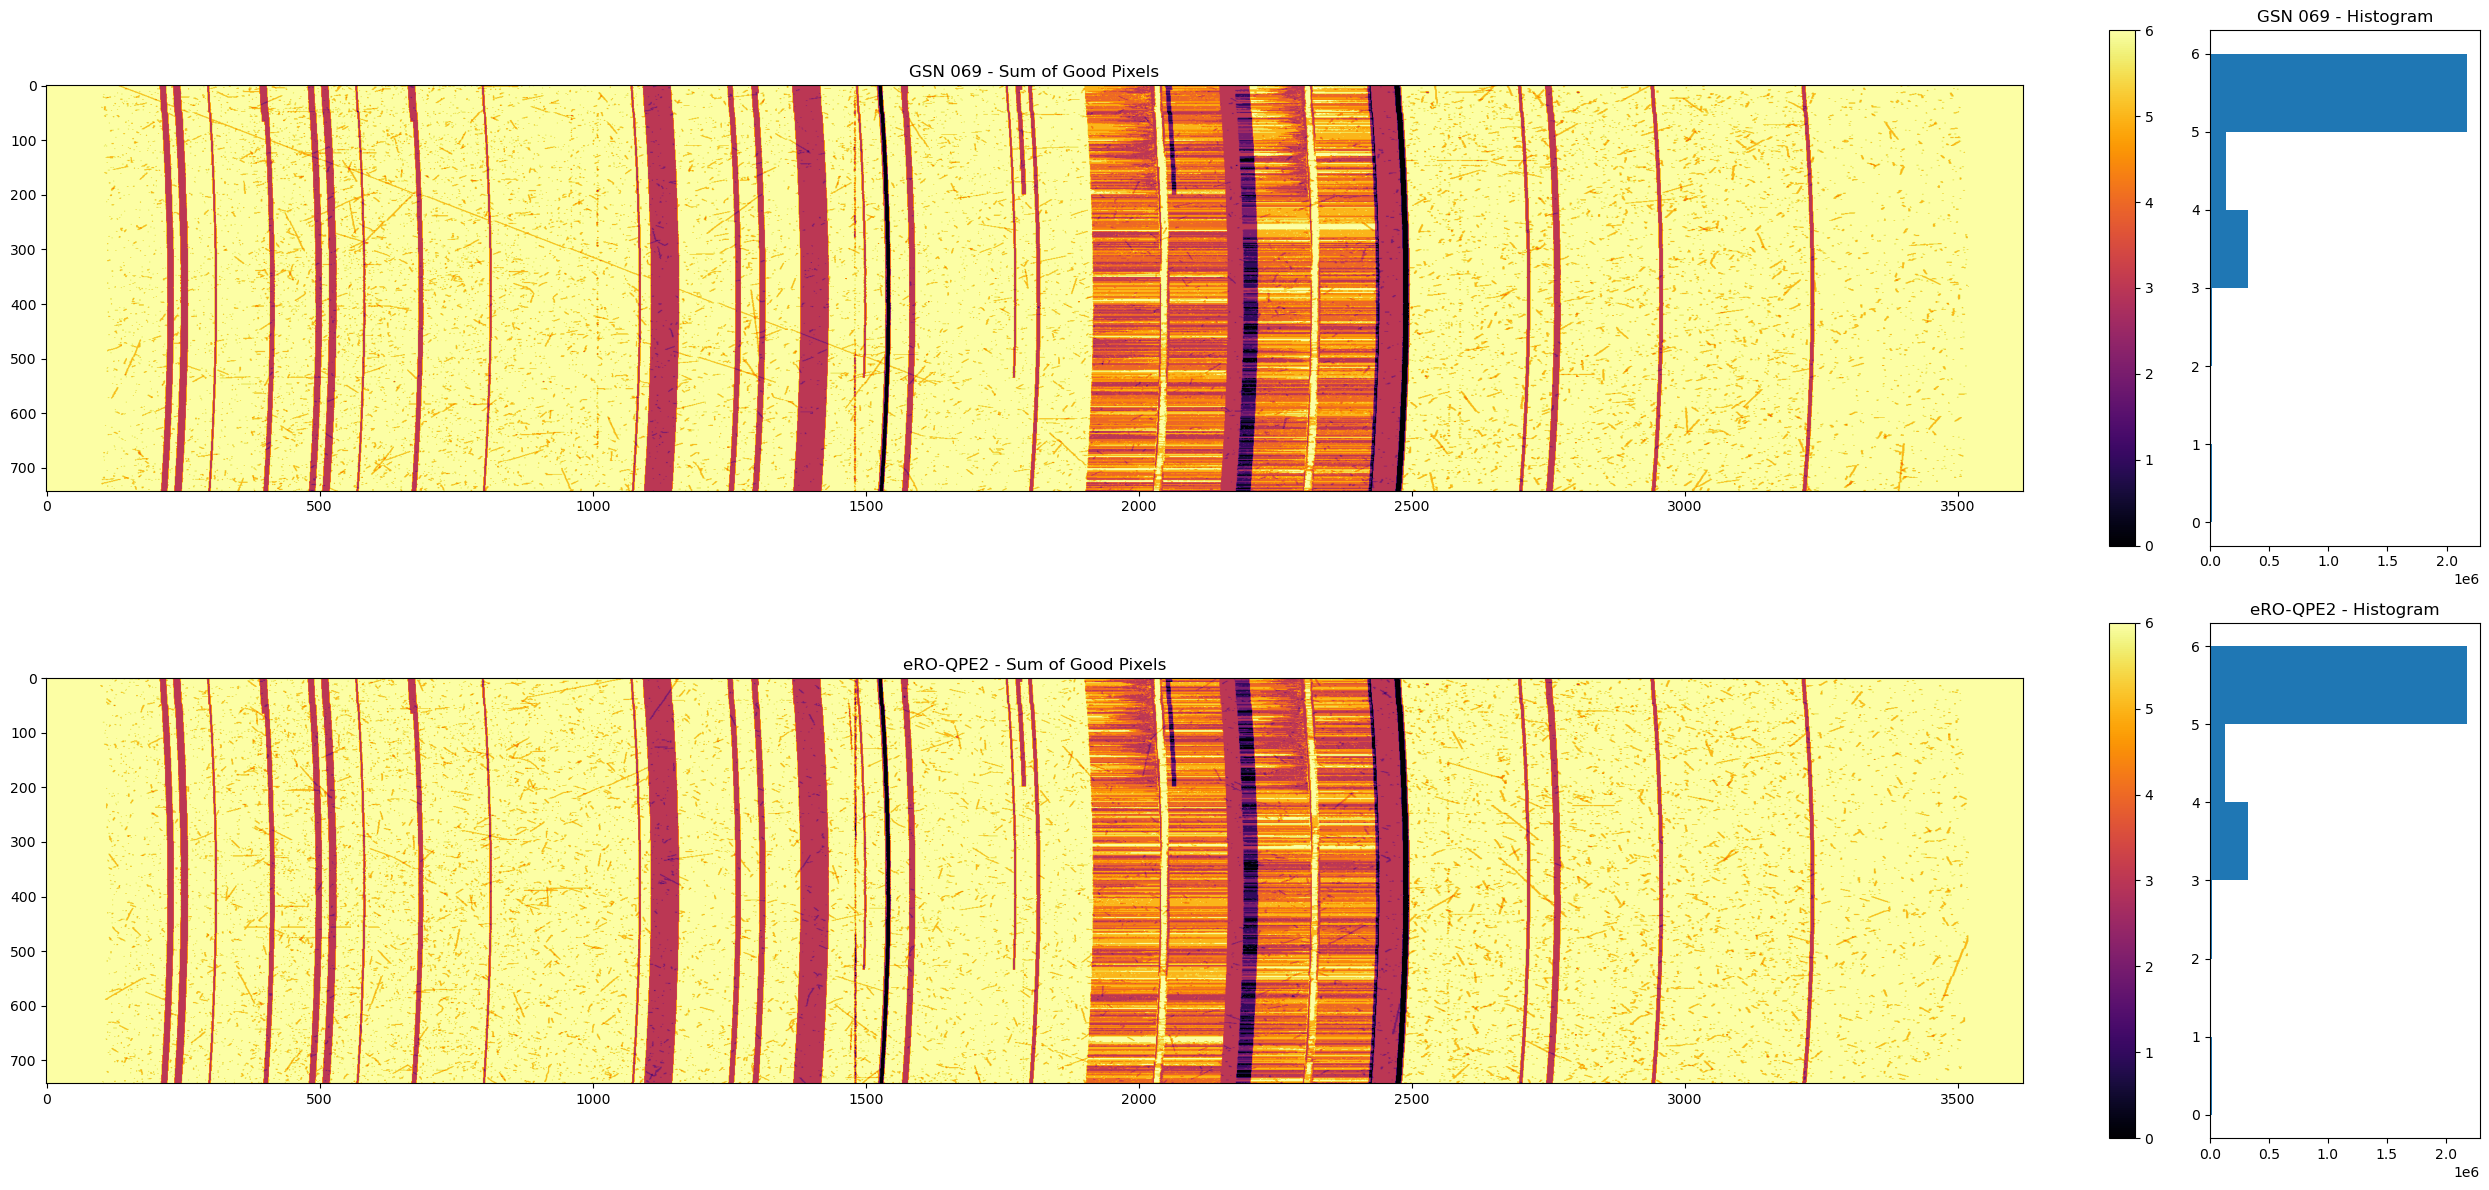

In [145]:
# Data quality assessment. Sums and visualize all data quality masks.
combined_dq = {}
num_objects = len(raw_data.keys())

# Create a GridSpec layout with 2 rows and num_objects*2 columns
fig = plt.figure(figsize=(25, 6*num_objects))
gs = gridspec.GridSpec(num_objects, 2, width_ratios=[8, 1])  # 5:1 width ratio between 2D plot and histogram

for idx, object in enumerate(raw_data.keys()):
    combined_dq[object] = [file['mask'] for file in raw_data[object].values()]
    combined_dq[object] = np.sum(combined_dq[object], axis=0)
    
    # Display the sum of good pixels using most of the row
    ax_imshow = plt.subplot(gs[idx, 0])
    im = ax_imshow.imshow(combined_dq[object], cmap='inferno')
    ax_imshow.set_title(f"{object} - Sum of Good Pixels")
    fig.colorbar(im, ax=ax_imshow, fraction=0.046, pad=0.04)  # Added colorbar here
    
    # Histogram of good pixels on the right side
    ax_hist = plt.subplot(gs[idx, 1])
    ax_hist.hist(combined_dq[object].ravel(), bins=6, orientation='horizontal')
    ax_hist.set_title(f"{object} - Histogram")

plt.tight_layout()
plt.show()


In [8]:
# Combines sci and var data. Multiply each sci and var observation by its quality mask, then averages all masked observations for each object
combined_spectra = {}
for object, data in raw_data.items():
    combined_spectra[object] = {}

    # Set bad pixels to np.nan
    nan_masked_data = [np.where(observation['mask'] == False, np.nan, observation['sci']) for observation in data.values()]
    nan_masked_var = [np.where(observation['mask'] == False, np.nan, observation['var']) for observation in data.values()]
    
    # Compute the sum, mean, and standard deviation using np.nan-aware functions
    combined_spectra[object]['sum'] = np.nansum(nan_masked_data, axis=0)
    combined_spectra[object]['mean'] = np.nanmean(nan_masked_data, axis=0)
    combined_spectra[object]['std'] = np.nanstd(nan_masked_data, axis=0)
    combined_spectra[object]['sample_size'] = np.sum([data['mask'] for data in data.values()], axis=0)
    combined_spectra[object]['DQ'] = raw_data[object][list(data.keys())[0]]['dq']
    combined_spectra[object]['VAR'] = np.nanmean(nan_masked_var, axis=0)

combined_spectra.keys()

/tmp/ipykernel_97702/3439941204.py:12: RuntimeWarning: Mean of empty slice
  combined_spectra[object]['mean'] = np.nanmean(nan_masked_data, axis=0)
/net/ASTRO/brunoritter/miniconda3/envs/qperedux/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_97702/3439941204.py:16: RuntimeWarning: Mean of empty slice
  combined_spectra[object]['VAR'] = np.nanmean(nan_masked_var, axis=0)


dict_keys(['eRO-QPE2', 'GSN 069'])

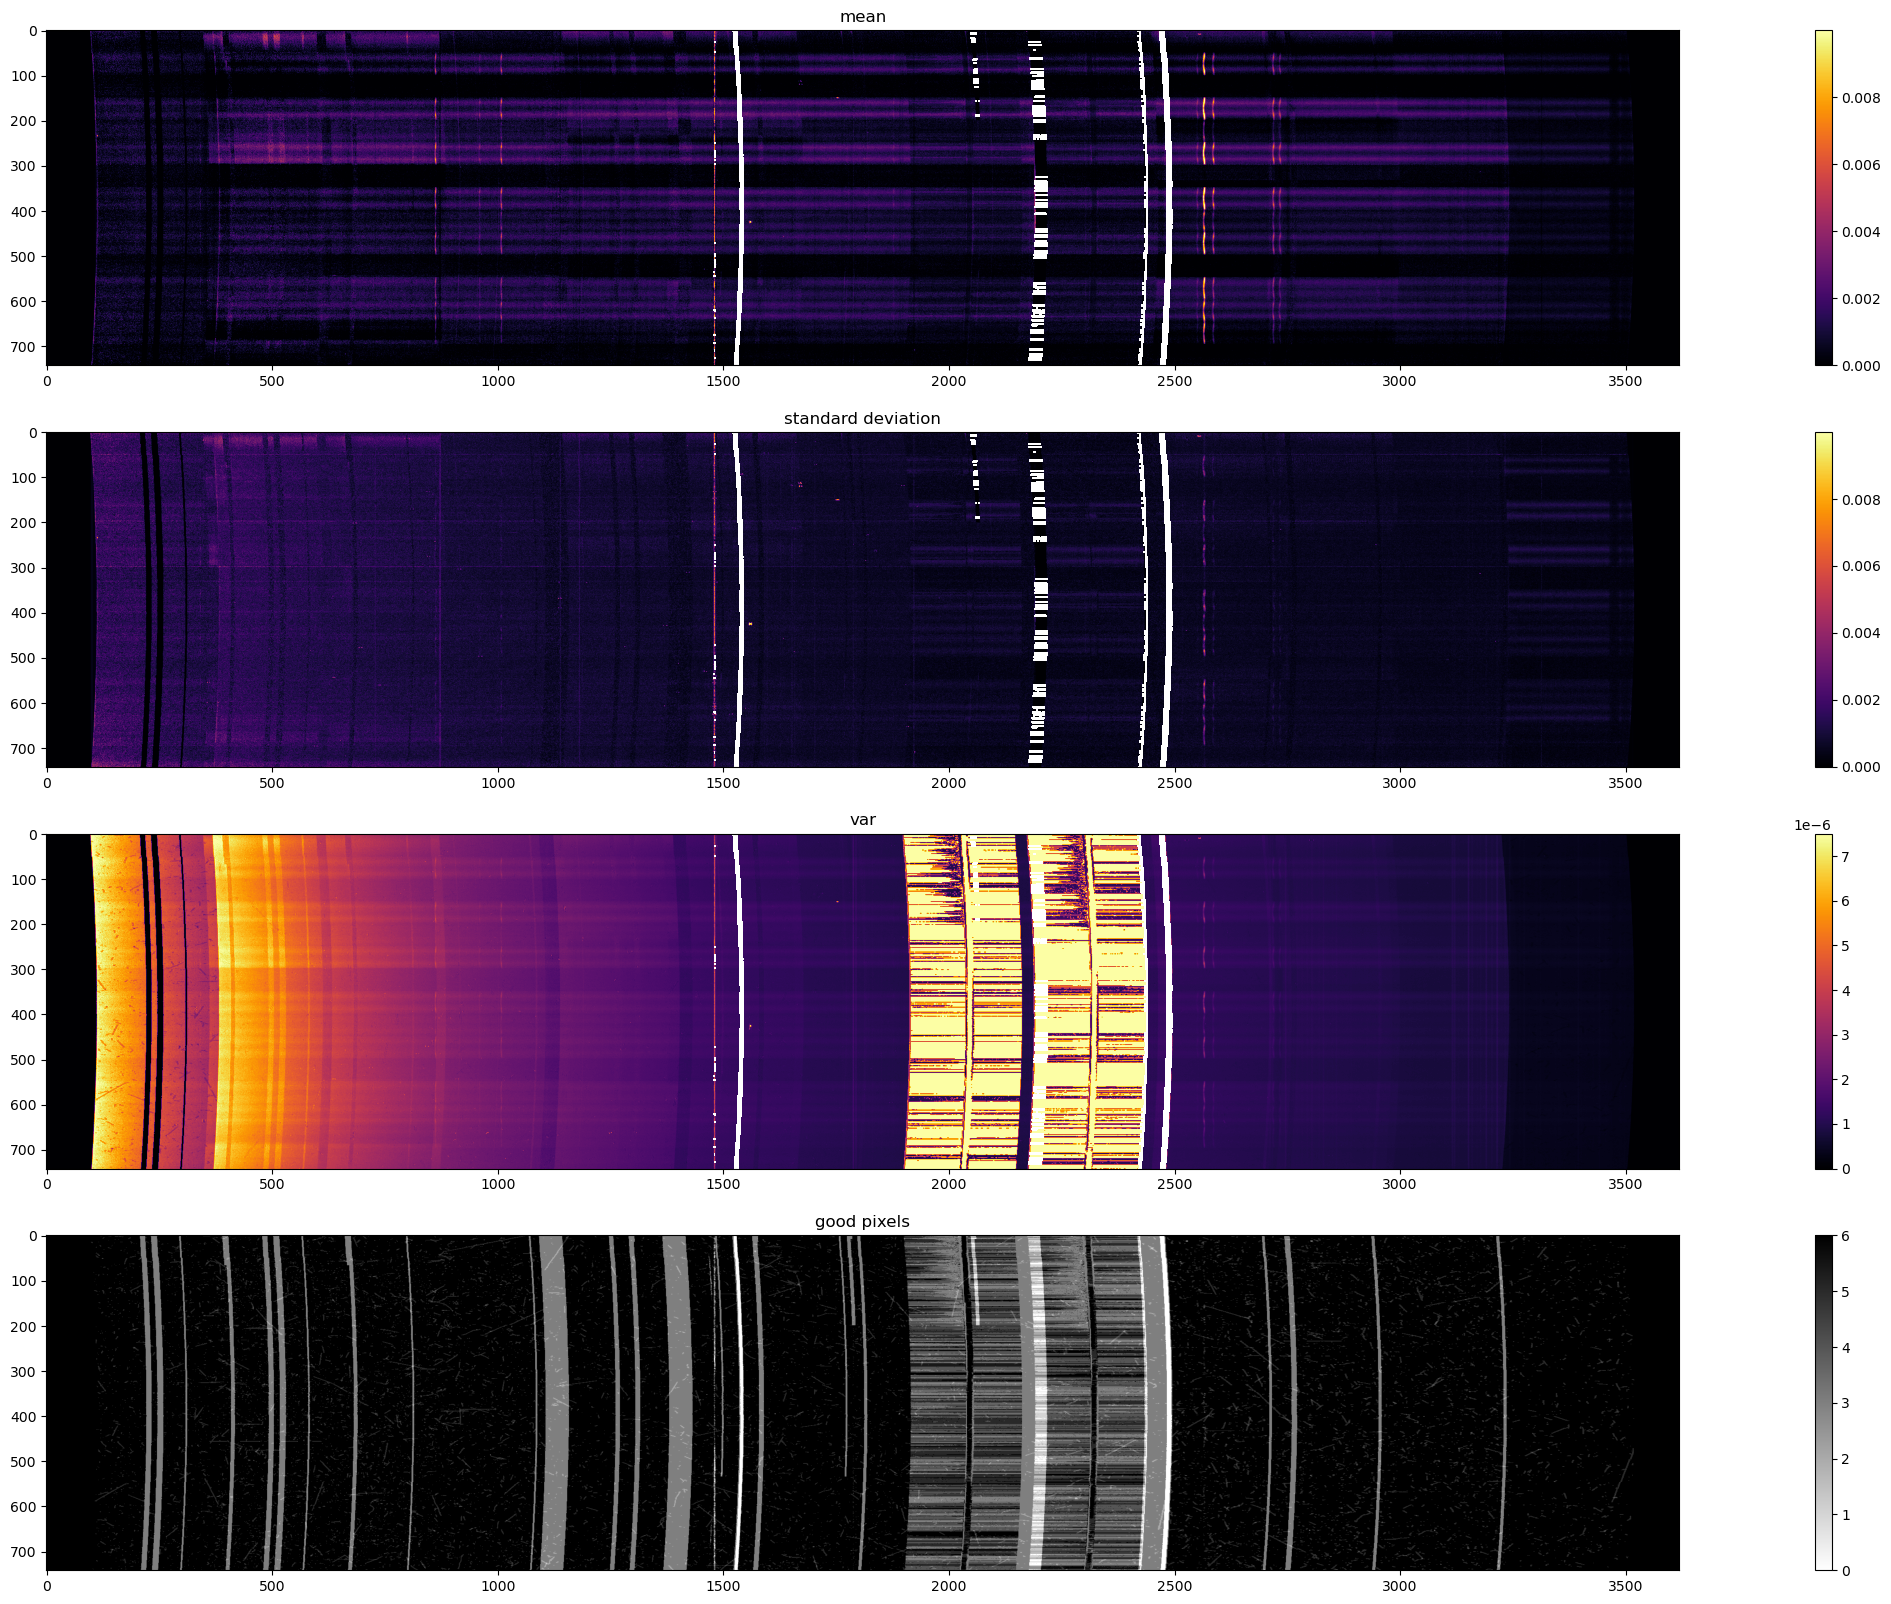

In [21]:
# Visual inspection of the combination of sci data and data quality mask
object = 'eRO-QPE2'

# Define thresholds
max_val_mean = .01
min_val_mean = 0

max_val_sum = .06
min_val_sum = 0

max_val_std = .01
min_val_std = 0

min_val_var = 0
max_val_var = .0000075

fig, axs = plt.subplots(4, 1, figsize=(35, 20))

im_mean = axs[0].imshow(np.clip(combined_spectra[object]['mean'], min_val_mean, max_val_mean), cmap='inferno')
fig.colorbar(im_mean, ax=axs[0])
axs[0].set_title("mean")

im_std = axs[1].imshow(np.clip(combined_spectra[object]['std'], min_val_std, max_val_std), cmap='inferno')
fig.colorbar(im_std, ax=axs[1])
axs[1].set_title('standard deviation')

im_var = axs[2].imshow(np.clip(combined_spectra[object]['VAR'], min_val_var, max_val_var), cmap='inferno')
fig.colorbar(im_var, ax=axs[2])
axs[2].set_title("var")

im_sample = axs[3].imshow(combined_spectra[object]['sample_size'], cmap='binary')
fig.colorbar(im_sample, ax=axs[3])
axs[3].set_title('good pixels')

plt.show()


In [27]:
# Create a new FITS file for the combined spectra
fits_dic = {}
for object_name in combined_spectra.keys():
    fits_dic[object_name] = {}
    fits_dic[object_name]['SCI'] = combined_spectra[object_name]['mean']
    fits_dic[object_name]['VAR'] = np.square(combined_spectra[object_name]['std'])
    fits_dic[object_name]['DQ'] = combined_spectra[object_name]['DQ']


for object_name, data in fits_dic.items():

    filename = f"redux/cstxeqxbrg{sci_files_object_mapping[object_name][0]}"
    with fits.open(filename) as og_hdu:

        for key, value in data.items():
            hdu = fits.ImageHDU(data=value, name=key)
            og_hdu[key] = hdu

        og_hdu.info()
        name = object_name.replace(" ", "").lower()
        og_hdu.writeto(f'redux/{name}_combined_spectra.fits', overwrite=True)


Filename: redux/cstxeqxbrgS20220929S0057.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   ()      
  1  MDF           1 BinTableHDU     41   750R x 8C   [1J, 1E, 1E, 5A, 1J, 1J, 1J, 1J]   
  2  SCI           1 ImageHDU         8   (3619, 742)   float32   
  3  VAR           1 ImageHDU         8   (3619, 742)   float32   
  4  DQ            1 ImageHDU        10   (3619, 742)   uint16   
Filename: redux/cstxeqxbrgS20220929S0044.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   ()      
  1  MDF           1 BinTableHDU     41   750R x 8C   [1J, 1E, 1E, 5A, 1J, 1J, 1J, 1J]   
  2  SCI           1 ImageHDU         8   (3619, 742)   float32   
  3  VAR           1 ImageHDU         8   (3619, 742)   float32   
  4  DQ            1 ImageHDU        10   (3619, 742)   uint16   


In [38]:
name = list(combined_spectra.keys())[0]
name = object_name.replace(" ", "").lower()
with fits.open(f'redux/{name}_combined_spectra.fits') as hdulist:
    data = hdulist['SCI'].data

data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype='>f4')

In [43]:
m = (fits_dic[object_name]['SCI'] == data)
np.all(np.isnan(fits_dic[object_name]['SCI'][~m]))

True